<a href="https://colab.research.google.com/github/Navya-2004/Titanic_Survival_Prediction_using-decision-tree-and-random-forest/blob/main/Big_Mart_Sales_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


**1.DATA COLLECTION AND ANALYSIS**

In [ ]:
#first 5 rows of the dataframe
df=pd.read_csv("Train.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
#last 5 rows of the dataframe
df.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
#display the volume of the dataset
df.shape

(8523, 12)

In [ ]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




Categorical Features:

    Item_Identifier
    Item_Fat_Content
    Item_Type
    Outlet_Identifier
    Outlet_Size
    Outlet_Location_Type
    Outlet_Type



In [ ]:
# checking for the null values
# df.isnull().sum() : Counts the number of null values in each column.
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
#df.isnull().any() : Checks if there are any null values at all in the DataFrame.
df.isnull().any()

,0
Item_Identifier,False
Item_Weight,True
Item_Fat_Content,False
Item_Visibility,False
Item_Type,False
Item_MRP,False
Outlet_Identifier,False
Outlet_Establishment_Year,False
Outlet_Size,True
Outlet_Location_Type,False


In [ ]:
df['Item_Weight'].mean()

12.857645184135976

In [ ]:
# Fill null values in 'Item_Weight' with the mean
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Fill null values in 'Outlet_Size' with the mode
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Data Analysis
**

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Plotting for the numerical features**

<ipython-input-20-f3f55244dcff>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


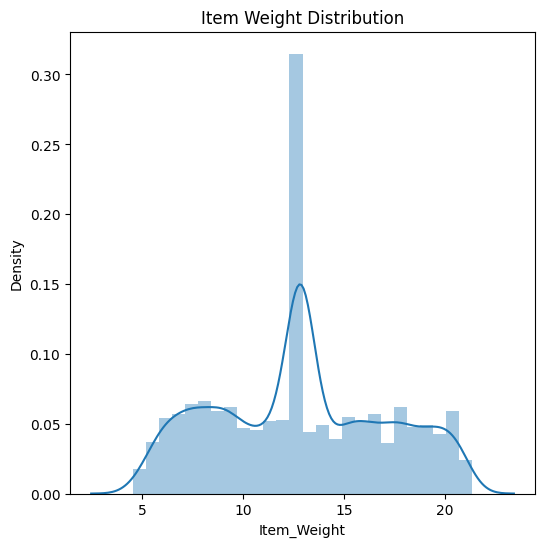

In [ ]:


import matplotlib.pyplot as plt
# Plot the distribution of 'Item_Weight'
plt.figure(figsize=(6, 6))
sns.distplot(df['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()




<ipython-input-21-fbafde0038ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


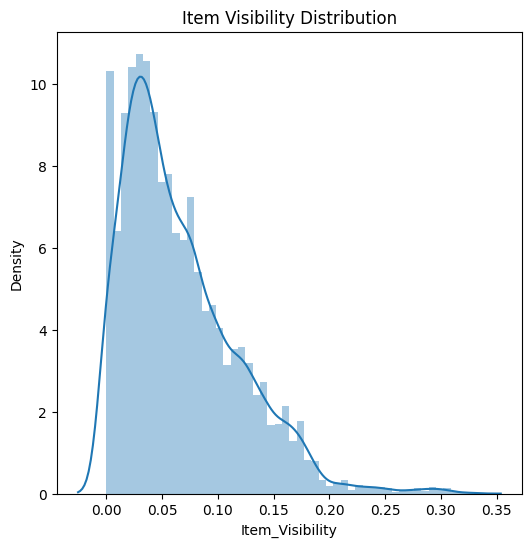

In [ ]:
# Plot the distribution of 'Item_Visibility'
plt.figure(figsize=(6, 6))
sns.distplot(df['Item_Visibility'])
plt.title('Item Visibility Distribution')
plt.show()

<ipython-input-22-7ed8c1276bac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


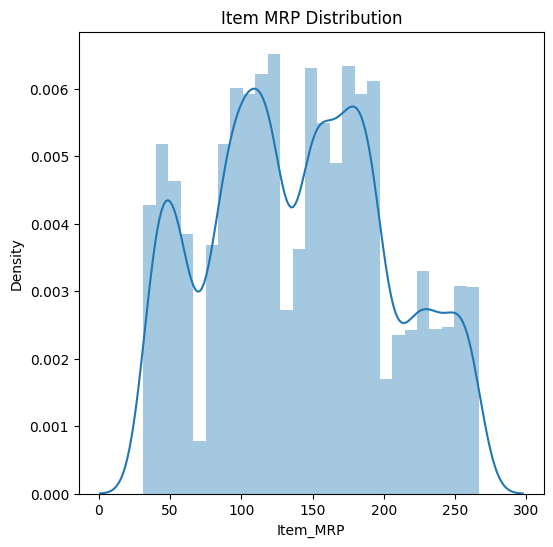

In [ ]:
# Plot the distribution of 'Item_MRP'
plt.figure(figsize=(6, 6))
sns.distplot(df['Item_MRP'])
plt.title('Item MRP Distribution')
plt.show()


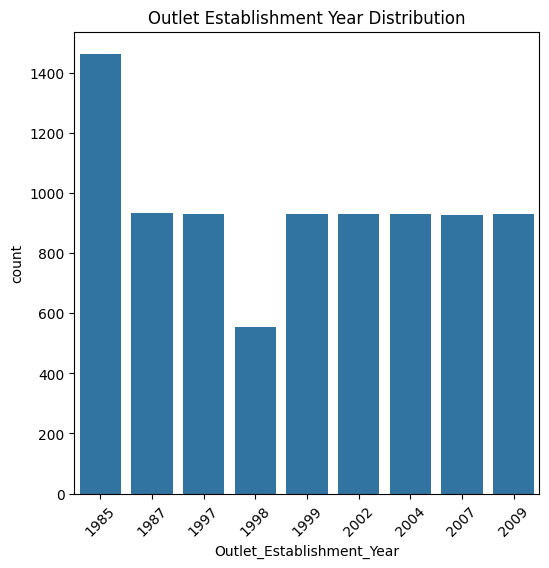

In [ ]:
# Plot the distribution of 'Outlet_Establishment_Year'
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.title('Outlet Establishment Year Distribution')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


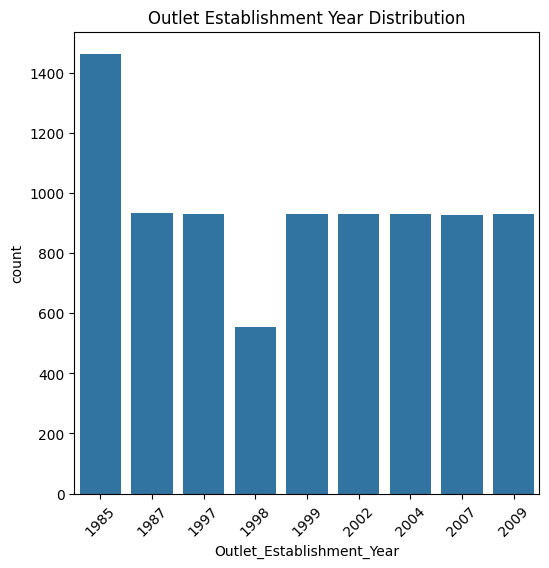

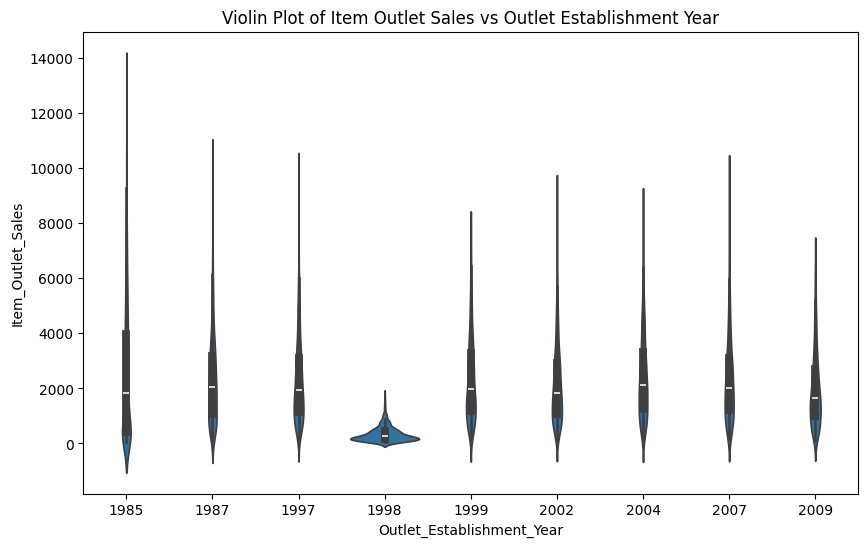

In [ ]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)
plt.title('Violin Plot of Item Outlet Sales vs Outlet Establishment Year')
plt.show()


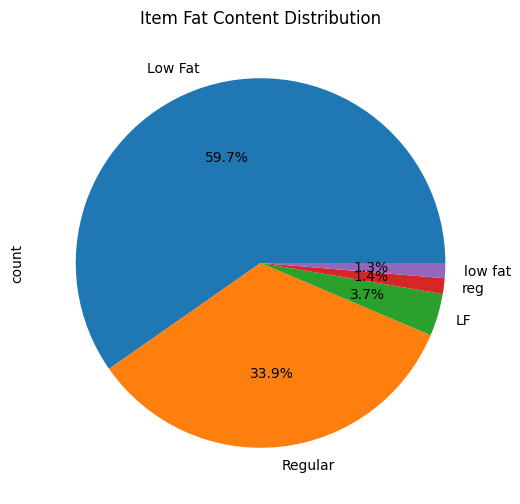

In [ ]:

import matplotlib.pyplot as plt
# Plot the pie chart for 'Item_Fat_Content'
plt.figure(figsize=(6, 6))
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Item Fat Content Distribution')
plt.show()




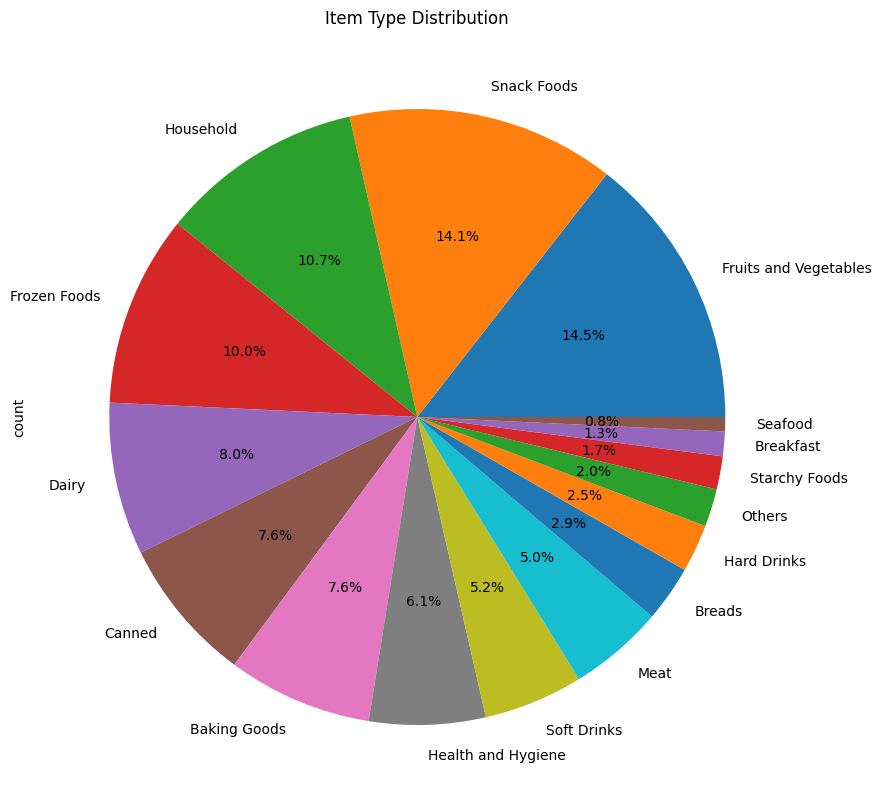

In [ ]:
# Plot the pie chart for 'Item_Type'
plt.figure(figsize=(10, 10))
df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Item Type Distribution')
plt.show()

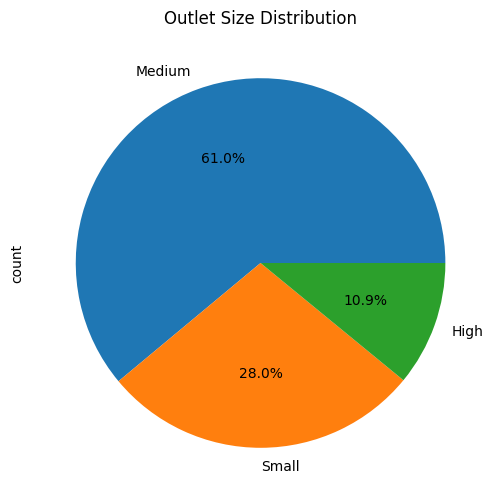

In [ ]:
# Plot the pie chart for 'Outlet_Size'
plt.figure(figsize=(6, 6))
df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outlet Size Distribution')
plt.show()

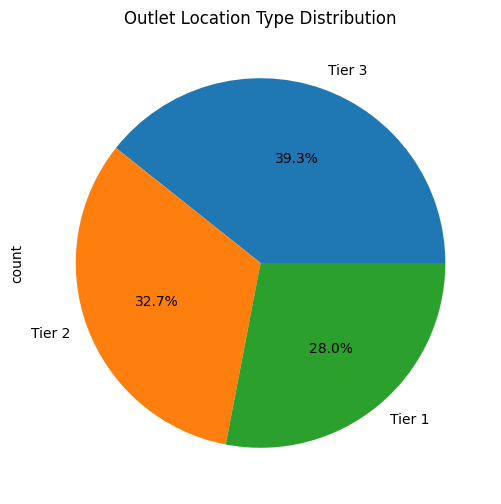

In [ ]:
# Plot the pie chart for 'Outlet_Location_Type'
plt.figure(figsize=(6, 6))
df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outlet Location Type Distribution')
plt.show()

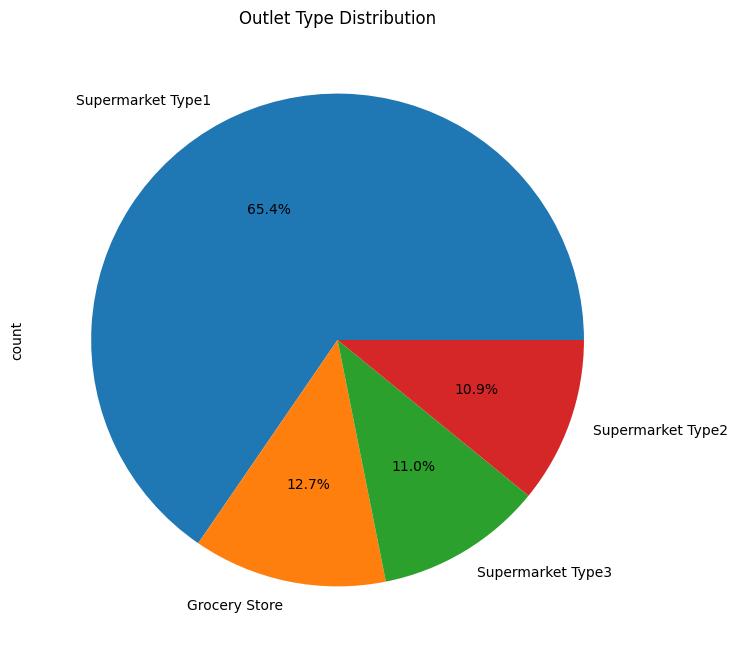

In [ ]:
# Plot the pie chart for 'Outlet_Type'
plt.figure(figsize=(8, 8))
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outlet Type Distribution')
plt.show()


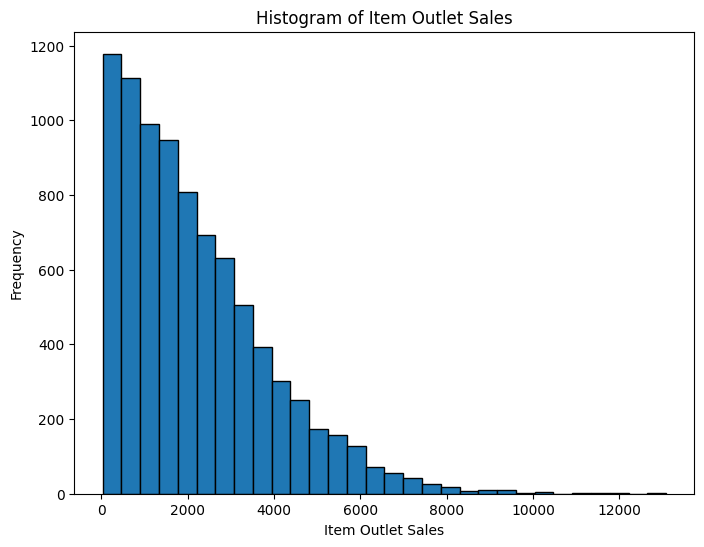

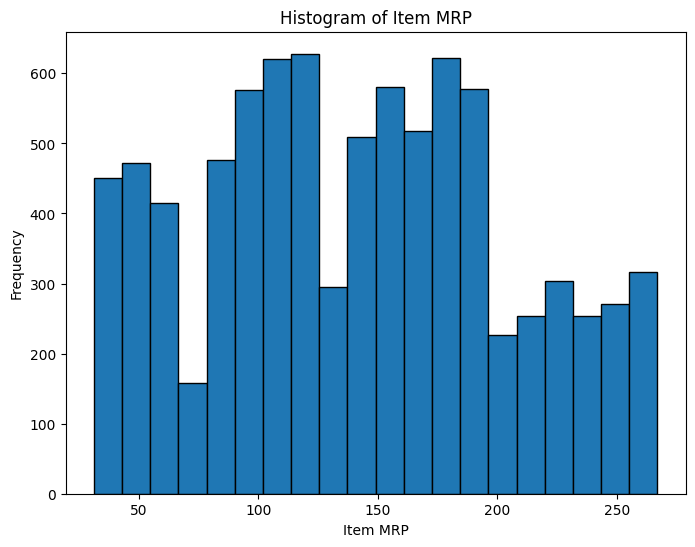

In [ ]:


import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame (as defined in your previous code)

# Example histogram for 'Item_Outlet_Sales'
plt.figure(figsize=(8, 6))
plt.hist(df['Item_Outlet_Sales'], bins=30, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()


# Example histogram for 'Item_MRP'
plt.figure(figsize=(8,6))
plt.hist(df['Item_MRP'], bins = 20, edgecolor = 'black')
plt.title('Histogram of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()


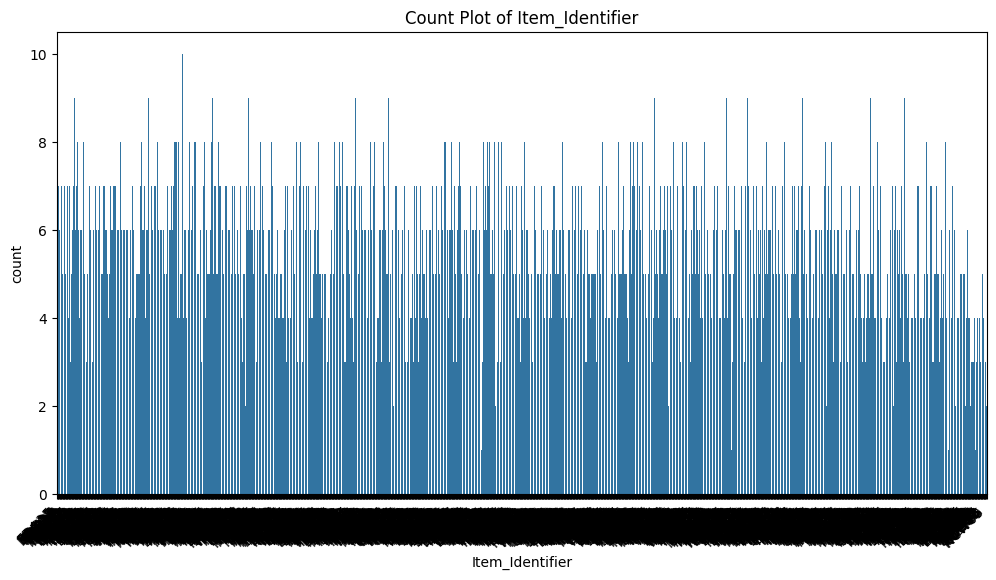

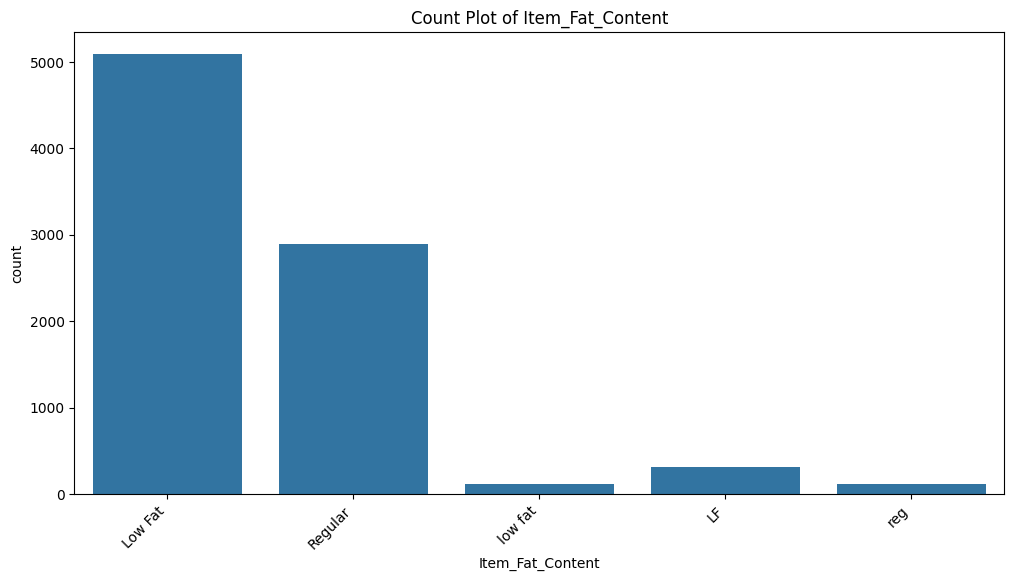

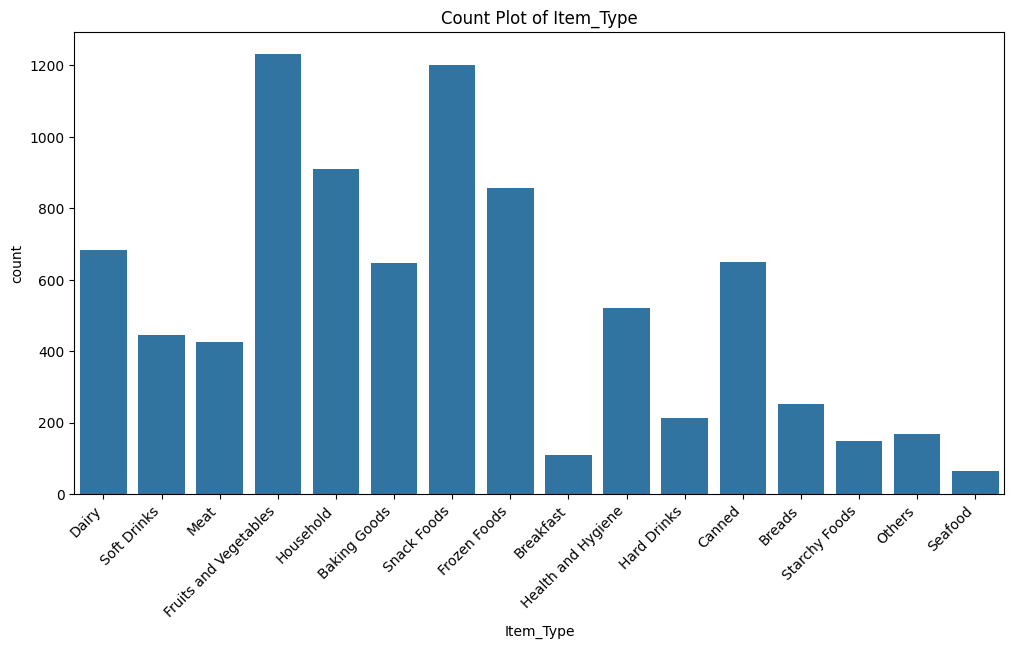

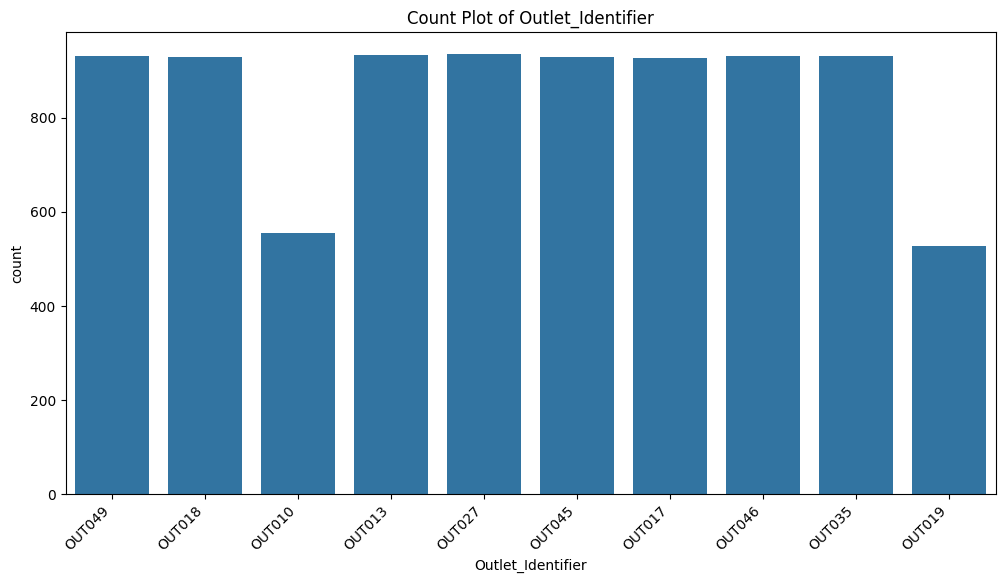

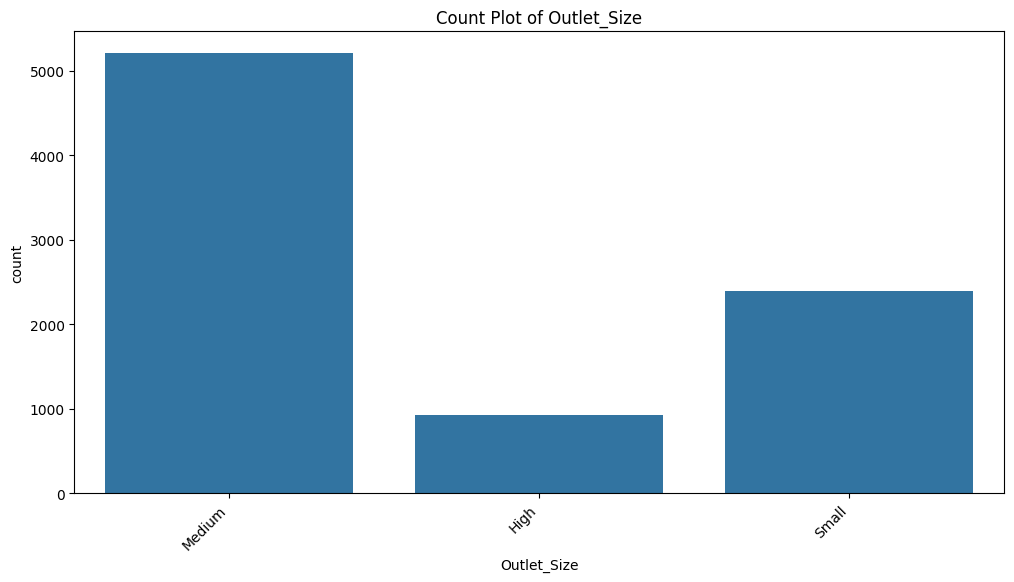

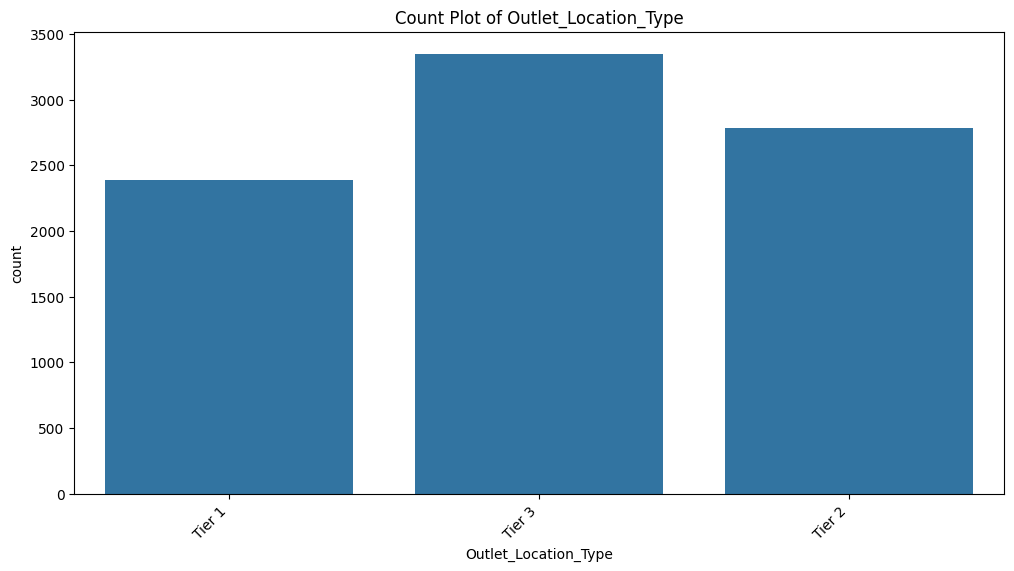

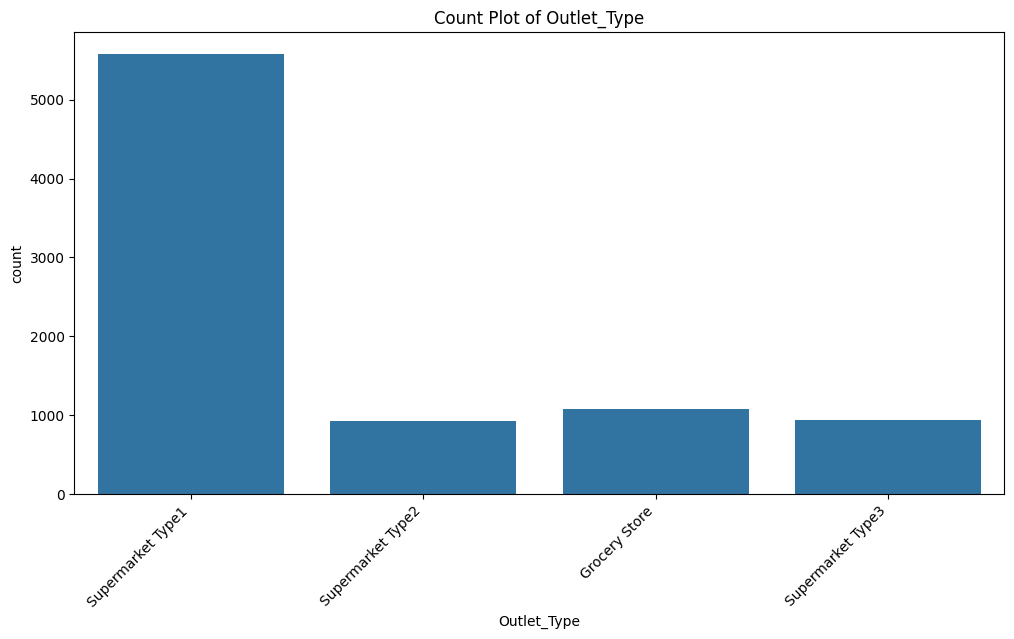

In [ ]:


import matplotlib.pyplot as plt
categorical_features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
                        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
                        'Outlet_Type']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


**DATA PRE PROCESSING**

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'})

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228


**Splitting features and Target**

In [ ]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**Splitting the data into Training data & Testing Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Machine Learning Model Training**

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R squared Value
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print('R Squared value= ',r2_train)

R Squared value=  0.8759287778441955


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.5060117482714839
